In [12]:
from difflib import get_close_matches
import pandas as pd
from mobfot import MobFot

client  = MobFot()

def parse_time(time):
    return f"{time.replace('T', ' ').rsplit('.', 1)[0]}"


ids = list()
for x in client.get_league(77)['matches']['allMatches']:
    ids.append(x['id'])


df = pd.read_csv("data/match_data.csv")
df['match_id'] = None

home_teams = df.home_team.unique()
away_teams = df.away_team.unique()
for id in ids:
    match = client.get_match_details(id)['general']
    parsed_time = parse_time(match['matchTimeUTCDate'])
    date_string = parsed_time.split(' ')[0]
    time_string = parsed_time.split(' ')[1]
    time_string = str((int(time_string.split(':')[0]) + 3) % 24) + ':00:00'
    time = date_string + ' ' + time_string
    home_team = match['homeTeam']['name']
    if home_team == 'USA':
        home_team = 'United States'
    if home_team == 'South Korea':
        home_team = 'Korea Republic'
    home_team = get_close_matches(home_team, home_teams, n=1, cutoff=0.5)[0]
    
    away_team = match['awayTeam']['name']
    if away_team == 'USA':
        away_team = 'United States'
    if away_team == 'South Korea':
        away_team = 'Korea Republic'
    away_team = get_close_matches(away_team, away_teams, n=1, cutoff=0.5)[0]
    print(f"Currently adding {time} {home_team} vs {away_team}")
    df.loc[(df.match_time == time) & (df.home_team == home_team) & (df.away_team == away_team), 'match_id'] = id

df.to_csv("data/match_data.csv", index=False)


Currently adding 2022-11-20 19:00:00 Qatar vs Ecuador
Currently adding 2022-11-21 16:00:00 England vs IR Iran
Currently adding 2022-11-21 19:00:00 Senegal vs Netherlands
Currently adding 2022-11-21 22:00:00 United States vs Wales
Currently adding 2022-11-22 13:00:00 Argentina vs Saudi Arabia
Currently adding 2022-11-22 16:00:00 Denmark vs Tunisia
Currently adding 2022-11-22 19:00:00 Mexico vs Poland
Currently adding 2022-11-22 22:00:00 France vs Australia
Currently adding 2022-11-23 13:00:00 Morocco vs Croatia
Currently adding 2022-11-23 16:00:00 Germany vs Japan
Currently adding 2022-11-23 19:00:00 Spain vs Costa Rica
Currently adding 2022-11-23 22:00:00 Belgium vs Canada
Currently adding 2022-11-24 13:00:00 Switzerland vs Cameroon
Currently adding 2022-11-24 16:00:00 Uruguay vs Korea Republic
Currently adding 2022-11-24 19:00:00 Portugal vs Ghana
Currently adding 2022-11-24 22:00:00 Brazil vs Serbia
Currently adding 2022-11-25 13:00:00 Wales vs IR Iran
Currently adding 2022-11-25 16:

In [71]:
id = df.loc[0, 'match_id']
match = client.get_match_details(id)

In [72]:
match['content']['lineup']['lineup'][0]['players'][3][0]['id']

'613792'

In [75]:
from icecream import ic
import json

structure = match['content']['lineup']['lineup'][0]['lineup']
player_data = match['content']['lineup']['lineup'][0]['players'][3][0]
ic(player_data)

ic| player_data: {'events': {'yc': 1},
                  'fantasyScore': {'bgcolor': 'purple', 'num': None},
                  'id': '613792',
                  'imageUrl': 'https://images.fotmob.com/image_resources/playerimages/613792.png',
                  'isCaptain': False,
                  'isGoalkeeper': False,
                  'isHomeTeam': True,
                  'localizedPosition': {'key': 'centerforward_short', 'label': 'CF'},
                  'minutesPlayed': 90,
                  'name'

: {'firstName': 'Akram', 'fullName': 'Akram Afif', 'lastName': 'Afif'},
                  'pageUrl': '/players/613792/akram-afif',
                  'position': 'Attacker',
                  'positionId': 104,
                  'positionRow': 5,
                  'positionStringShort': 'CF',
                  'rating': {'bgcolor': '#f08022',
                             'isTop': {'isMatchFinished': True, 'isTopRating': False},
                             'num': '6.1'},
                  'role': 'Midfielder',
                  'shirt': 11,
                  'shotmap': [{'blockedX': None,
                               'blockedY': None,
                               'eventType': 'Miss',
                               'expectedGoals': 0.02272138185799122,
                               'expectedGoalsOnTarget': None,
                               'goalCrossedY': 33.39,
                               'goalCrossedZ': 5.7925517344,
                               'id': 2486980543,
         

{'id': '613792',
 'positionId': 104,
 'position': 'Attacker',
 'positionStringShort': 'CF',
 'localizedPosition': {'label': 'CF', 'key': 'centerforward_short'},
 'name': {'firstName': 'Akram', 'lastName': 'Afif', 'fullName': 'Akram Afif'},
 'shirt': 11,
 'usualPosition': 2,
 'usingOptaId': False,
 'teamId': '5902',
 'imageUrl': 'https://images.fotmob.com/image_resources/playerimages/613792.png',
 'pageUrl': '/players/613792/akram-afif',
 'isHomeTeam': True,
 'timeSubbedOn': None,
 'timeSubbedOff': None,
 'positionRow': 5,
 'role': 'Midfielder',
 'isCaptain': False,
 'events': {'yc': 1},
 'rating': {'num': '6.1',
  'bgcolor': '#f08022',
  'isTop': {'isTopRating': False, 'isMatchFinished': True}},
 'fantasyScore': {'num': None, 'bgcolor': 'purple'},
 'minutesPlayed': 90,
 'shotmap': [{'id': 2486980543,
   'eventType': 'Miss',
   'teamId': 5902,
   'playerId': 613792,
   'playerName': 'Akram Afif',
   'x': 77.6422330112,
   'y': 47.714140124400004,
   'min': 75,
   'minAdded': None,
   'i

In [84]:
homeTeam = match['general']['homeTeam']['name']
awayTeam = match['general']['awayTeam']['name']

homeTeam

'Qatar'

In [81]:
client.get_team('613792')

In [35]:
from difflib import get_close_matches
import pandas as pd
from mobfot import MobFot
from icecream import ic

client  = MobFot()

def get_player_data(match):
    homePlayers = list()
    for x in match['content']['lineup']['lineup'][0]['players']:
        for y in x:
            homePlayers.append(y)

    awayPlayers = list()
    for x in match['content']['lineup']['lineup'][1]['players']:
        for y in x:
            awayPlayers.append(y)
            
    return homePlayers, awayPlayers
            

id = 3854556
match = client.get_match_details(id)

homePlayers, awayPlayers = get_player_data(match)

def parse_api_results(player):
    if not player['isGoalkeeper']:
        name = player['name']['fullName']
        position = player['positionStringShort']
        rating  = player['rating']['num']
        role = player['role'].lower()
        stats = player['stats']
        for x in stats:
            if x['key'] == 'top_stats':
                top_stats = x
                new_top_stats = dict()
                for y in top_stats['stats']:
                    new_top_stats[top_stats['stats'][y]['key']] = top_stats['stats'][y]['value']
                top_stats = new_top_stats
            elif x['key'] == 'attack':
                attack_stats = x
                new_attack_stats = dict()
                for y in attack_stats['stats']:
                    new_attack_stats[attack_stats['stats'][y]['key']] = attack_stats['stats'][y]['value']
                attack_stats = new_attack_stats
            elif x['key'] == 'defense':
                defense_stats = x
                new_defense_stats = dict()
                for y in defense_stats['stats']:
                    new_defense_stats[defense_stats['stats'][y]['key']] = defense_stats['stats'][y]['value']
                defense_stats = new_defense_stats
            elif x['key'] == 'duels':
                duel_stats = x
                new_duel_stats = dict()
                for y in duel_stats['stats']:
                    new_duel_stats[duel_stats['stats'][y]['key']] = duel_stats['stats'][y]['value']
                duel_stats = new_duel_stats
        
        new_results = {
        'name': name,
        'position': position,
        'rating': rating,
        'role': role,
        'top_stats': top_stats,
        'attack_stats': attack_stats,
        'defense_stats': defense_stats,
        'duel_stats': duel_stats
    }
    else:
        name = player['name']['fullName']
        position = player['positionStringShort']
        rating  = player['rating']['num']
        role = player['role'].lower()
        top_stats = player['stats'][0]  
        new_results = {
        'name': name,
        'position': position,
        'rating': rating,
        'role': role,
        'top_stats': top_stats
    }
    
    
    return new_results
    
    
parse_api_results(homePlayers[1])

{'name': 'Jurrien Timber',
 'position': 'CB',
 'rating': '6.7',
 'role': 'defender',
 'top_stats': {'rating_title': 6.72,
  'minutes_played': 90,
  'goals': 0,
  'assists': 0,
  'total_shots': 0,
  'accurate_passes': '53/61 (87%)',
  'chances_created': 0},
 'attack_stats': {'touches': 79,
  'dribbles_succeeded': '1/1 (100%)',
  'passes_into_final_third': 8,
  'long_balls_accurate': '4/7 (57%)',
  'dispossessed': 2},
 'defense_stats': {'tackles_succeeded': '2/2 (100%)',
  'clearances': 5,
  'headed_clearance': 1,
  'interceptions': 2,
  'defensive_actions': 15,
  'recoveries': 5},
 'duel_stats': {'duel_won': 4,
  'duel_lost': 9,
  'ground_duels_won': '3/11 (27%)',
  'aerials_won': '1/2 (50%)',
  'was_fouled': 0,
  'fouls': 6}}

In [14]:
ic(homePlayers[0])

ic| homePlayers[0]: {'events': {},
                     'fantasyScore': {'bgcolor': 'purple', 'num': None},
                     'id': '466852',
                     'imageUrl': 'https://images.fotmob.com/image_resources/playerimages/466852.png',
                     'isCaptain': False,
                     'isGoalkeeper': True,
                     'isHomeTeam': True,
                     'localizedPosition': {'key': 'keeper', 'label': 'GK'},
                     'minutesPlayed': 90,
                     'name': {'firstName': 'Andries',
                              'fullName': 'Andries Noppert',
                              'lastName': 'Noppert'},
                     'pageUrl': '/players/466852/andries-noppert',
                     'position': 'Keeper',
                     'positionId': 11,
                     'positionRow': 0,
                     'positionStringShort': 'GK',
                     'rating': {'bgcolor': '#1ec853',
                                'isTop': {'isMatc

{'id': '466852',
 'positionId': 11,
 'position': 'Keeper',
 'positionStringShort': 'GK',
 'localizedPosition': {'label': 'GK', 'key': 'keeper'},
 'name': {'firstName': 'Andries',
  'lastName': 'Noppert',
  'fullName': 'Andries Noppert'},
 'shirt': 23,
 'usualPosition': 0,
 'usingOptaId': False,
 'teamId': '6708',
 'imageUrl': 'https://images.fotmob.com/image_resources/playerimages/466852.png',
 'pageUrl': '/players/466852/andries-noppert',
 'isHomeTeam': True,
 'timeSubbedOn': None,
 'timeSubbedOff': None,
 'positionRow': 0,
 'role': 'Keeper',
 'isCaptain': False,
 'events': {},
 'rating': {'num': '7.1',
  'bgcolor': '#1ec853',
  'isTop': {'isTopRating': False, 'isMatchFinished': True}},
 'fantasyScore': {'num': None, 'bgcolor': 'purple'},
 'minutesPlayed': 90,
 'shotmap': [],
 'stats': [{'title': 'Top stats',
   'key': 'top_stats',
   'stats': {'FotMob rating': {'key': 'rating_title', 'value': 7.05},
    'Minutes played': {'key': 'minutes_played', 'value': 90},
    'Saves': {'key': 's

In [87]:

player_data = match['content']['lineup']['lineup'][0]['players'][3][1]
player_data

{'id': '644017',
 'positionId': 106,
 'position': 'Attacker',
 'positionStringShort': 'CF',
 'localizedPosition': {'label': 'CF', 'key': 'centerforward_short'},
 'name': {'firstName': 'Almoez', 'lastName': 'Ali', 'fullName': 'Almoez Ali'},
 'shirt': 19,
 'usualPosition': 3,
 'usingOptaId': False,
 'teamId': '5902',
 'imageUrl': 'https://images.fotmob.com/image_resources/playerimages/644017.png',
 'pageUrl': '/players/644017/almoez-ali',
 'isHomeTeam': True,
 'timeSubbedOn': None,
 'timeSubbedOff': 72,
 'positionRow': 5,
 'role': 'Attacker',
 'isCaptain': False,
 'events': {'yc': 1, 'sub': {'subbedOut': 72}},
 'rating': {'num': '5.6',
  'bgcolor': '#f08022',
  'isTop': {'isTopRating': False, 'isMatchFinished': True}},
 'fantasyScore': {'num': None, 'bgcolor': 'purple'},
 'minutesPlayed': 72,
 'shotmap': [{'id': 2486977597,
   'eventType': 'Miss',
   'teamId': 5902,
   'playerId': 644017,
   'playerName': 'Almoez Ali',
   'x': 99.01754385950001,
   'y': 29.295476189000002,
   'min': 45,


In [1]:
import pandas as pd

df = pd.read_csv("FIFA DataSet/Data/FIFA World Cup 2022 Match Data/data.csv")

df.head()

,match,dayofweek,match_time,home_team,away_team,home_xg,away_xg,score,attendance,venue,...,away_clearances,home_offsides,away_offsides,home_gks,away_gks,home_throw_ins,away_throw_ins,home_long_balls,away_long_balls,match_id
0,1,Sun,2022-11-20 19:00:00,Qatar,Ecuador,0.3,1.2,0–2,67372,Al Bayt Stadium,...,7,3,4,4,7,20,17,51,70,3370549
1,2,Mon,2022-11-21 16:00:00,England,IR Iran,2.1,1.4,6–2,45334,Khalifa International Stadium,...,23,2,2,5,5,18,17,87,50,3854559
2,3,Mon,2022-11-21 19:00:00,Senegal,Netherlands,0.9,0.7,0–2,41721,Al Thumama Stadium,...,16,2,1,6,10,17,28,64,66,3854554
3,4,Mon,2022-11-21 22:00:00,United States,Wales,0.8,1.5,1–1,43418,Ahmed bin Ali Stadium,...,31,1,1,5,10,22,25,56,90,3854560
4,5,Tue,2022-11-22 13:00:00,Argentina,Saudi Arabia,2.2,0.1,1–2,88012,Lusail Iconic Stadium,...,26,10,1,3,9,24,13,55,59,3854572


<Axes: >

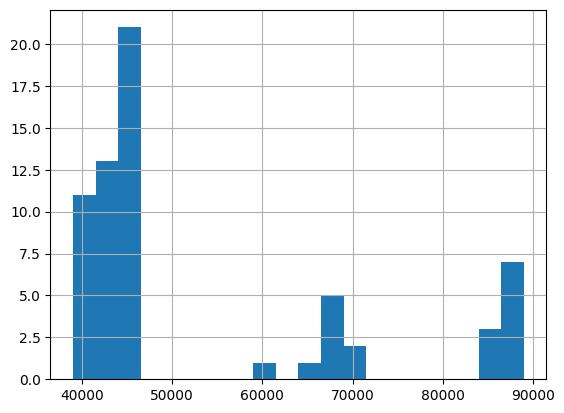

In [2]:
df.attendance.apply(lambda x: round(x, -3)).astype(int).hist(bins=20)

In [3]:
df.attendance.apply(lambda x: round(x, -3)).astype(int).describe()

count       64.000000
mean     53187.500000
std      17106.459376
min      39000.000000
25%      42750.000000
50%      44000.000000
75%      67000.000000
max      89000.000000
Name: attendance, dtype: float64

venue
Ahmed bin Ali Stadium            Axes(0.125,0.11;0.775x0.77)
Al Bayt Stadium                  Axes(0.125,0.11;0.775x0.77)
Al Janoub Stadium                Axes(0.125,0.11;0.775x0.77)
Al Thumama Stadium               Axes(0.125,0.11;0.775x0.77)
Education City Stadium           Axes(0.125,0.11;0.775x0.77)
Khalifa International Stadium    Axes(0.125,0.11;0.775x0.77)
Lusail Iconic Stadium            Axes(0.125,0.11;0.775x0.77)
Stadium 974                      Axes(0.125,0.11;0.775x0.77)
dtype: object

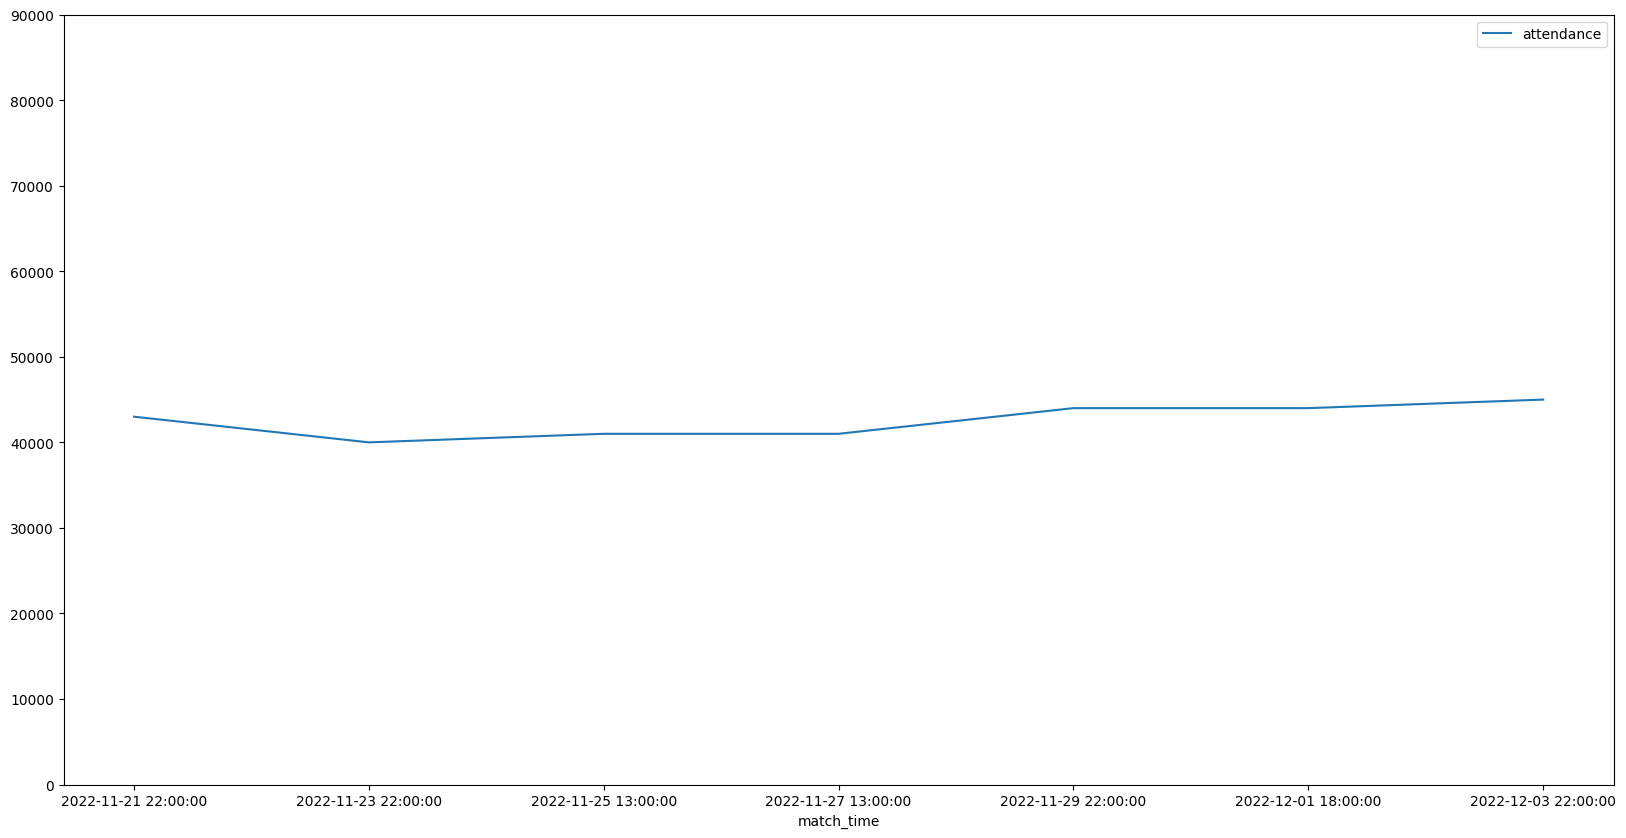

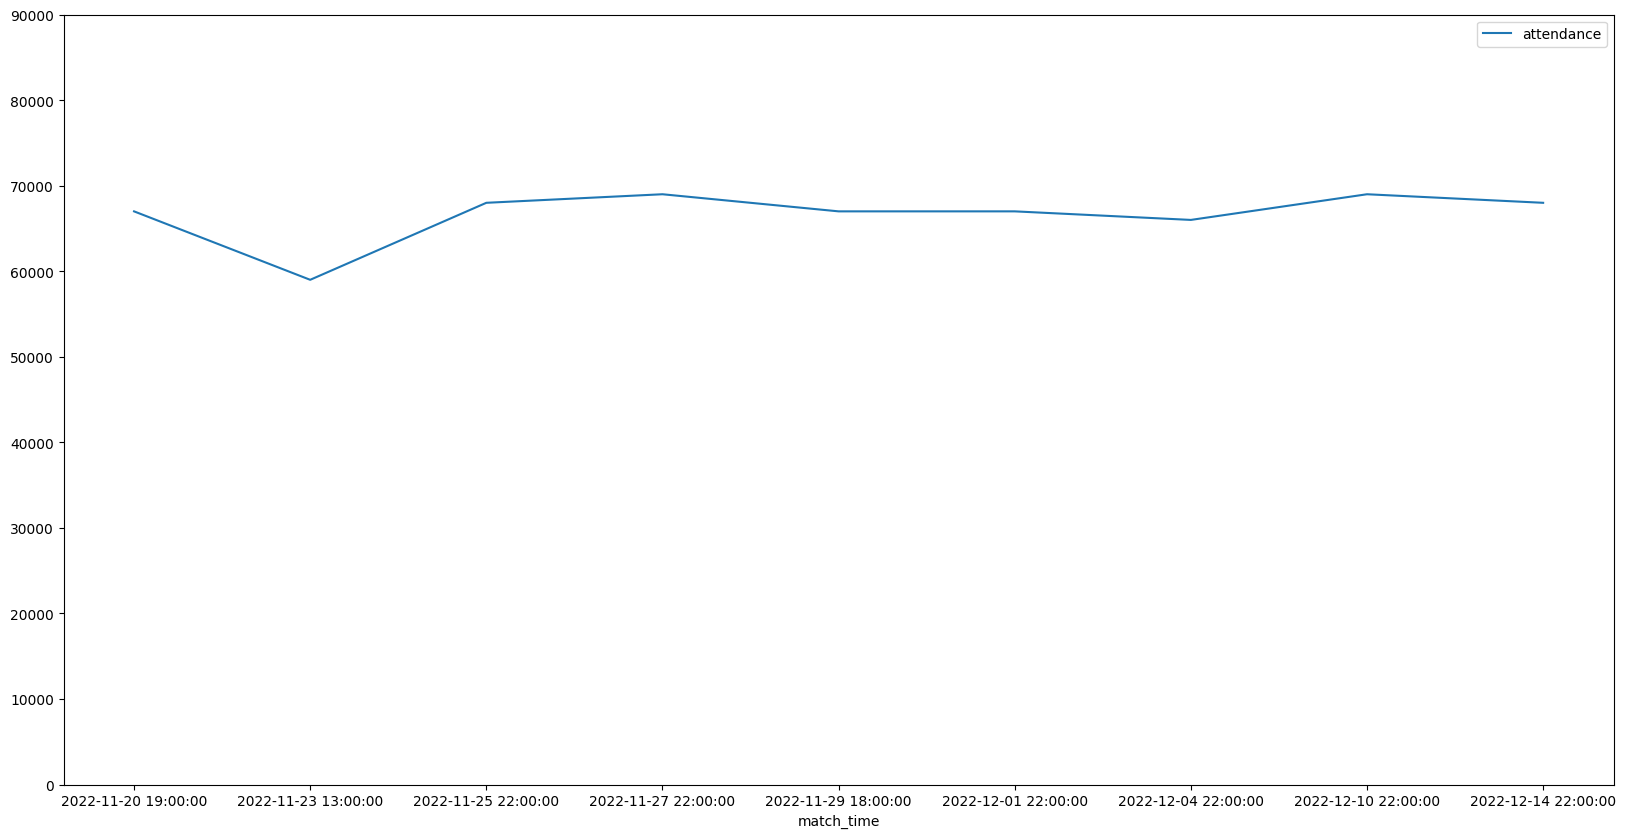

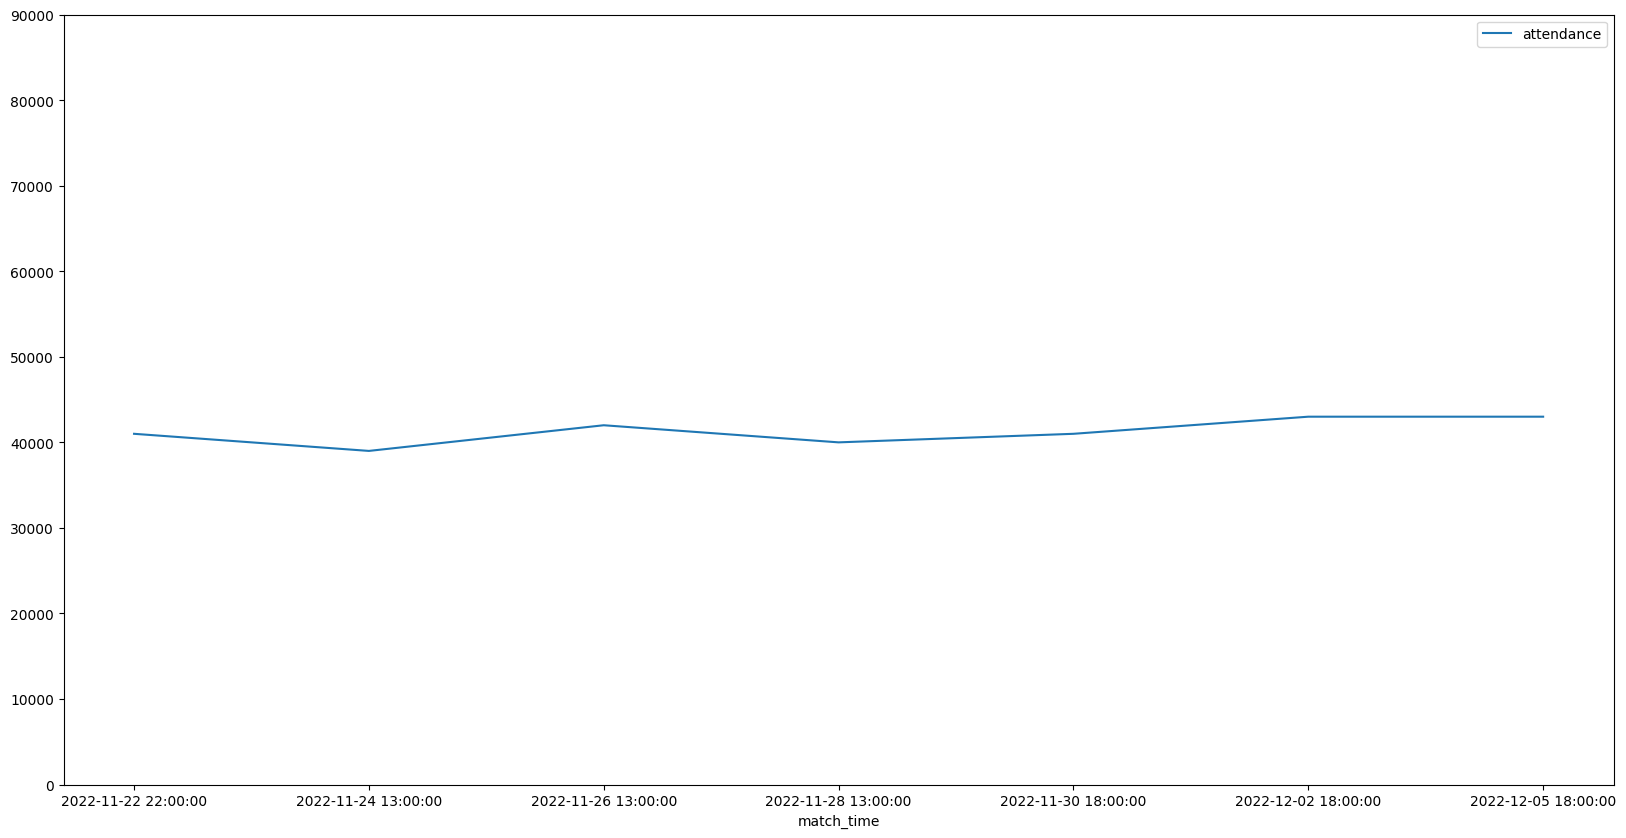

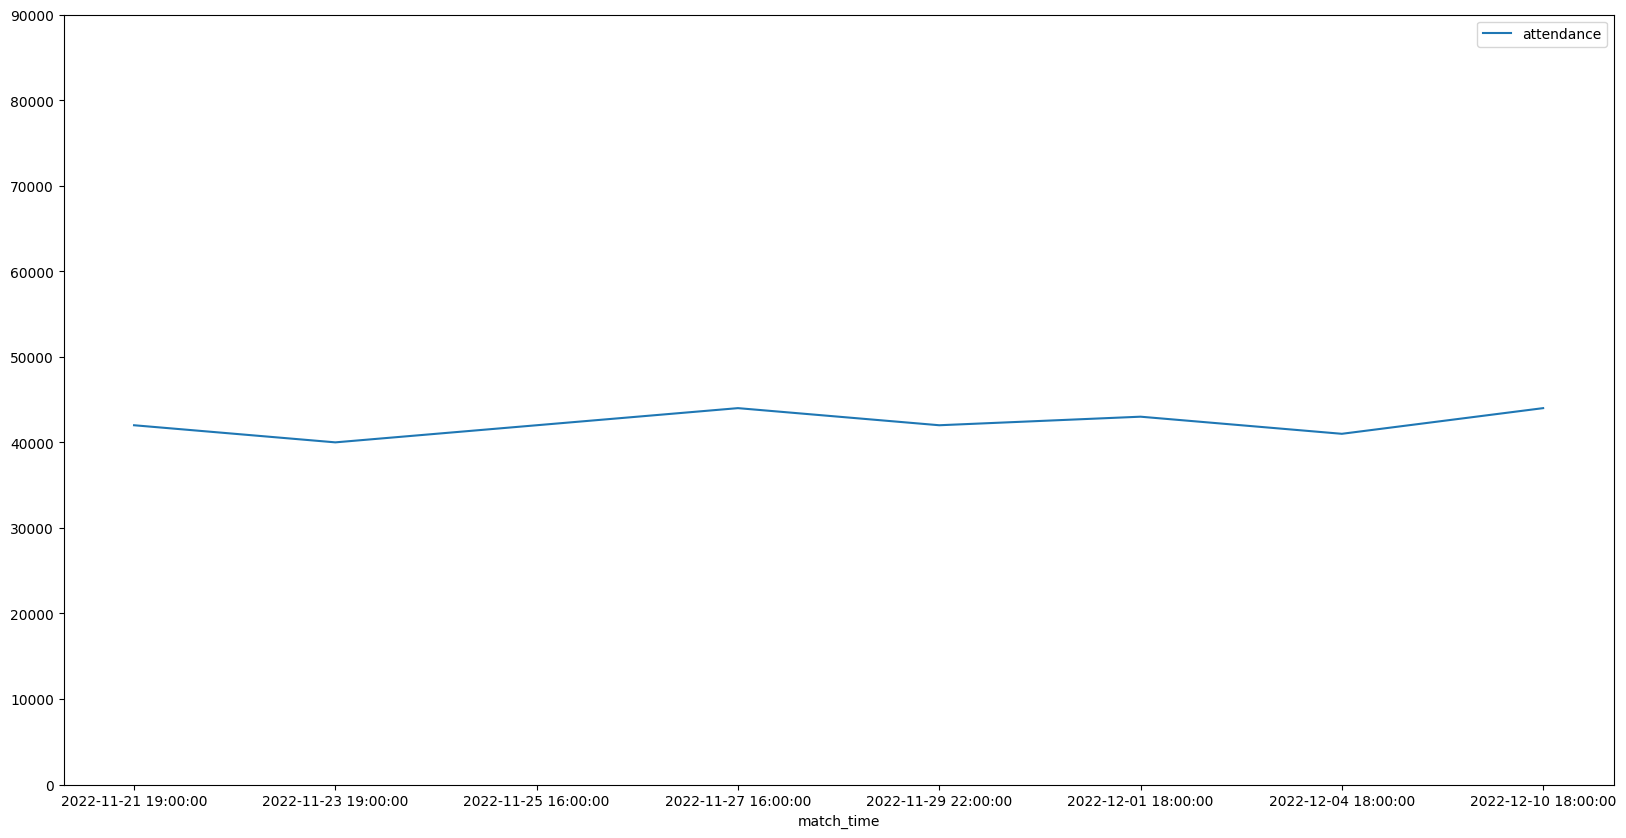

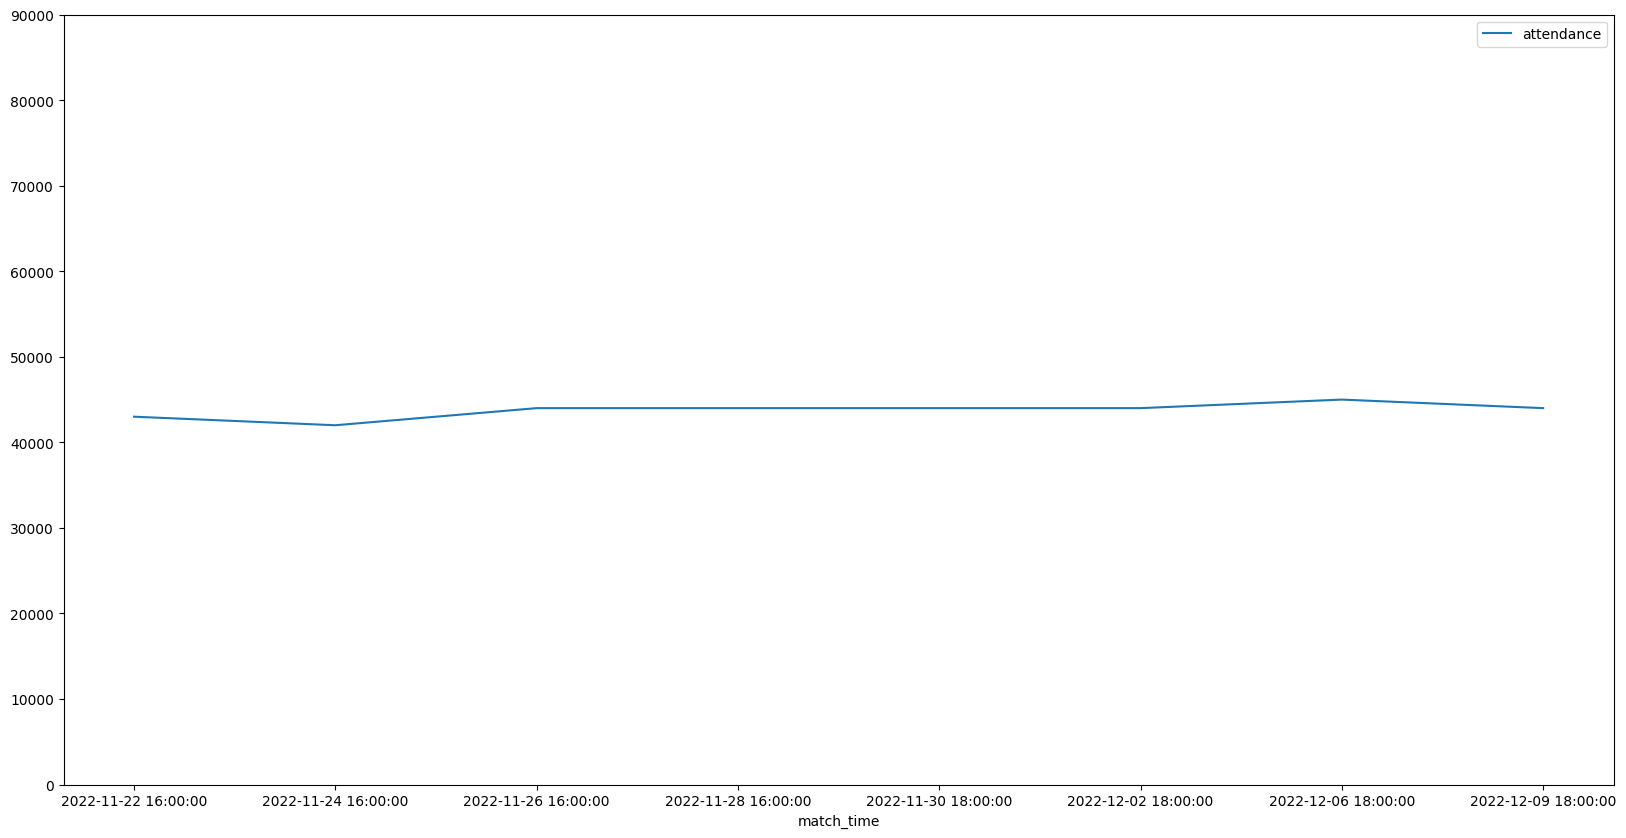

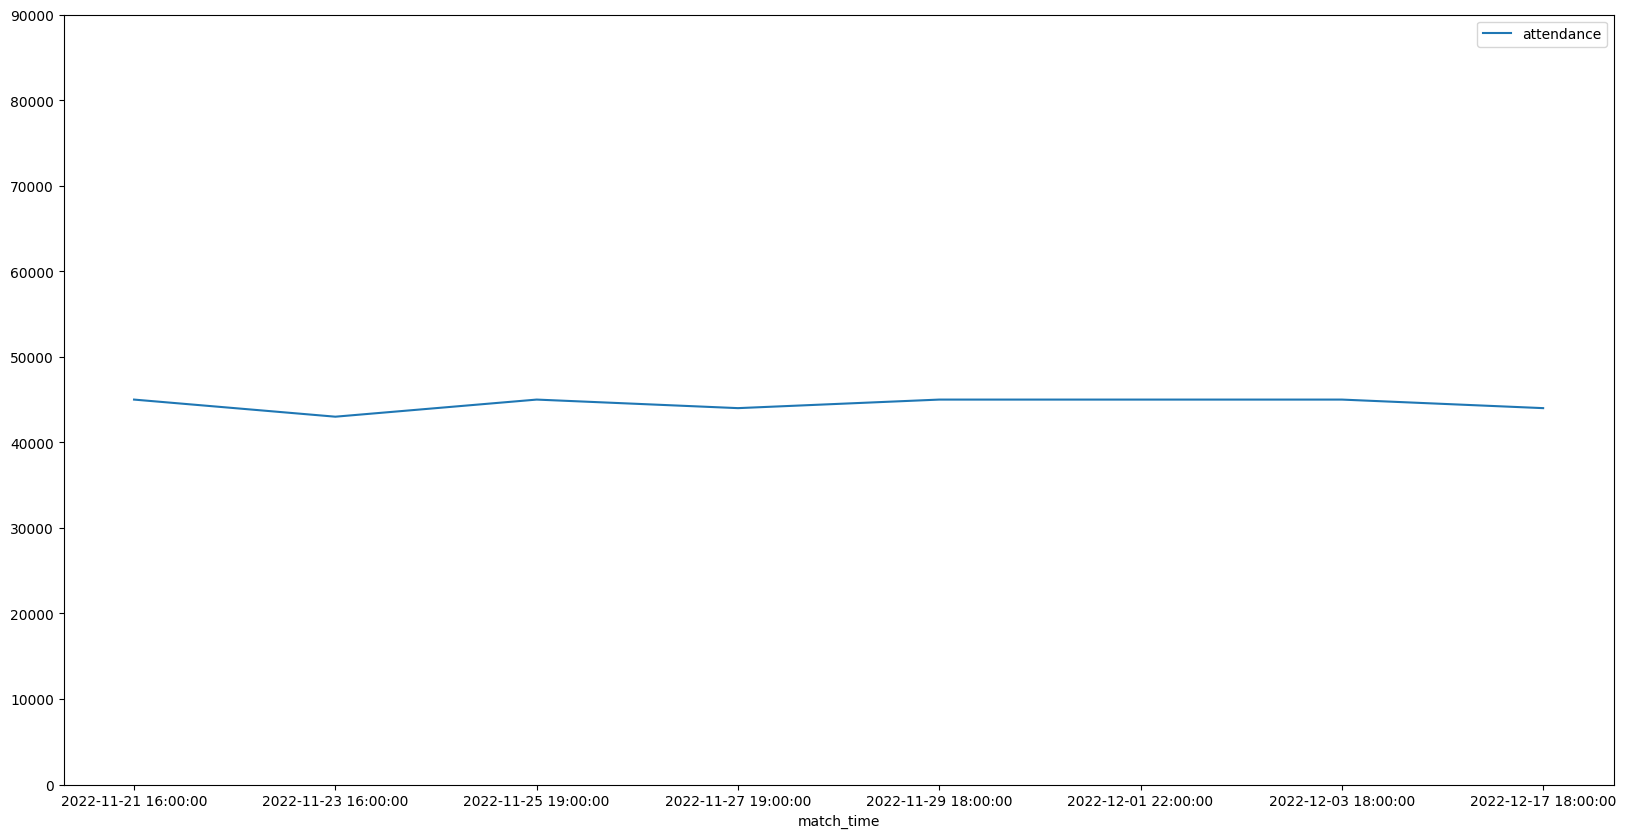

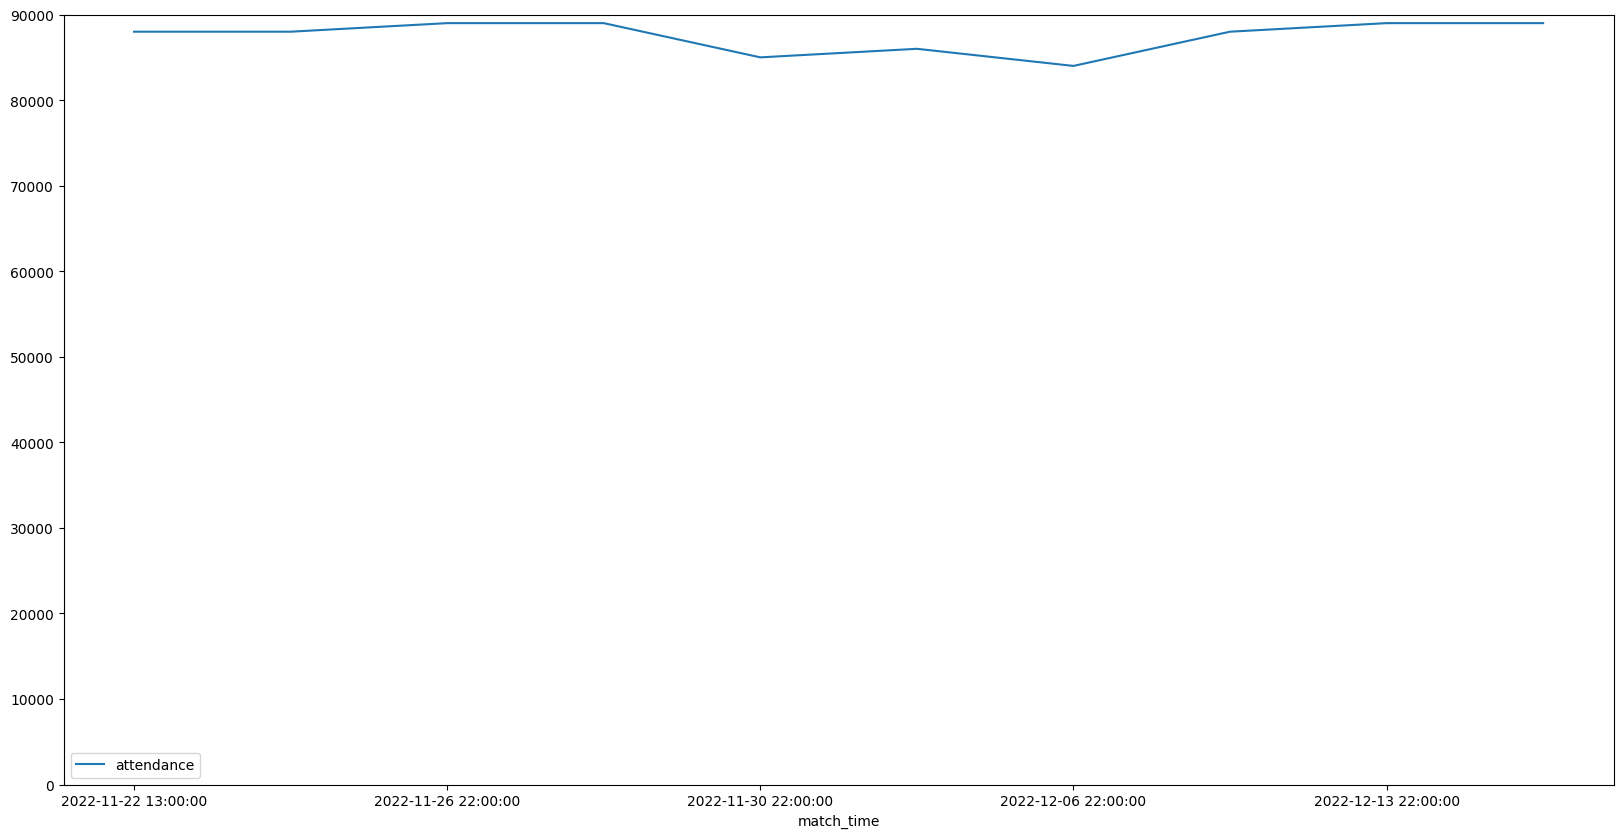

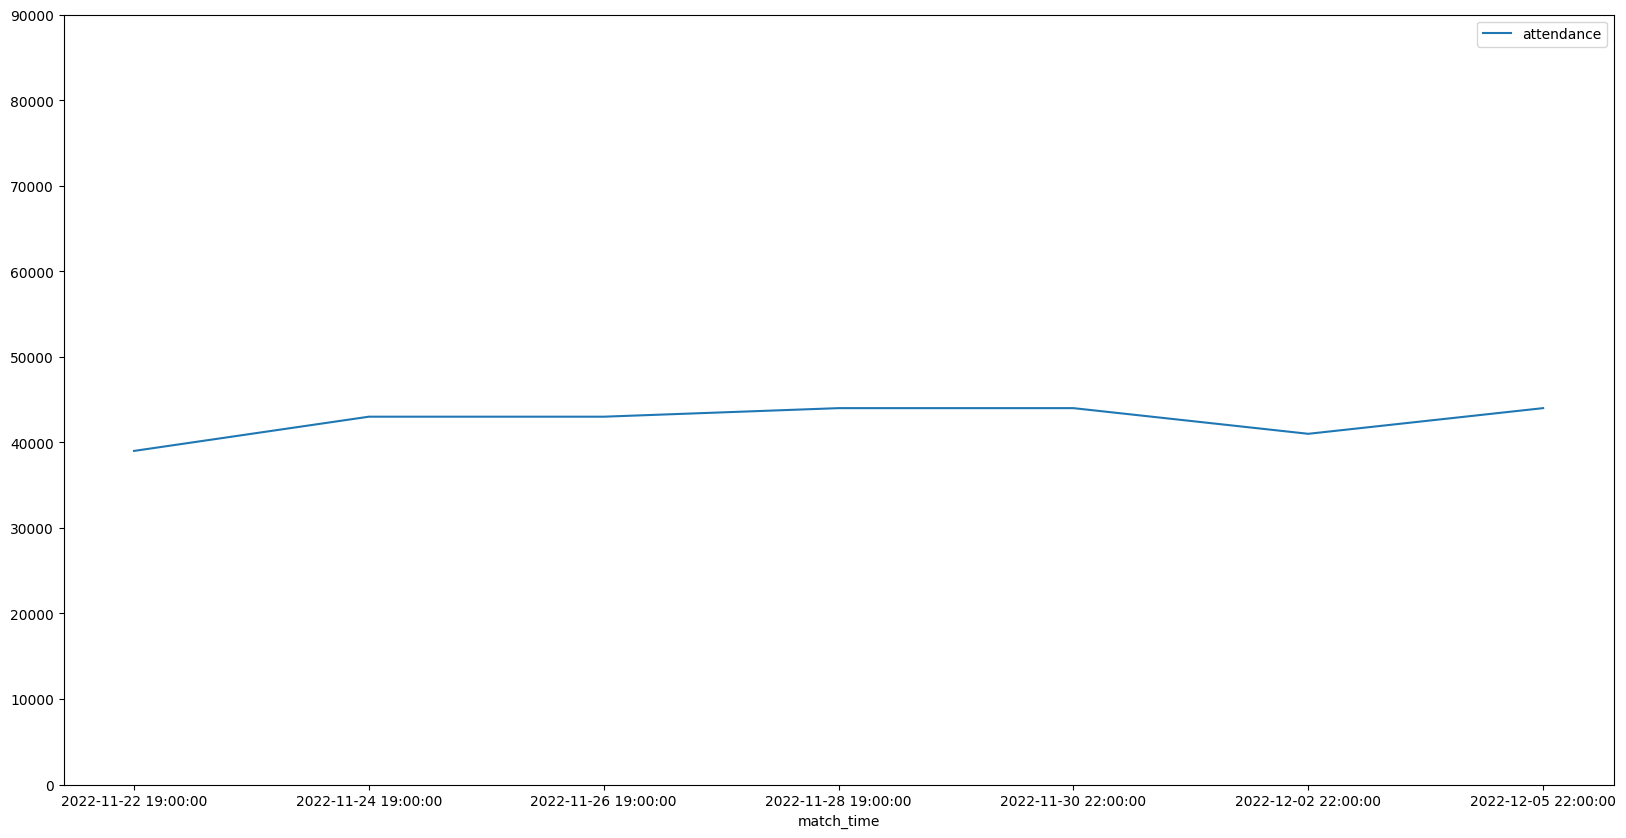

In [16]:
df.attendance = df.attendance.astype(int)

#create subplot with plot of attendance vs time for every venue

import matplotlib.pyplot as plt

df.groupby('venue').plot(x='match_time', y='attendance', figsize=(20, 10), yticks=[i for i in range(0, 100000, 10000)])




In [14]:
df.venue.unique()

array(['Al Bayt Stadium', 'Khalifa International Stadium',
       'Al Thumama Stadium', 'Ahmed bin Ali Stadium',
       'Lusail Iconic Stadium', 'Education City Stadium', 'Stadium 974',
       'Al Janoub Stadium'], dtype=object)

In [5]:
import pandas as pd
team_data_csv = f'data/team_data.csv'

df = pd.read_csv(team_data_csv)
df_teams = pd.read_csv(f'data/group_stats.csv')

In [6]:
df_teams['group'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

In [7]:
teams_in_group = df_teams[df_teams['group'] == 1]

In [9]:
teams_in_group['team']

0    Netherlands
1        Senegal
2        Ecuador
3          Qatar
Name: team, dtype: object

In [11]:
#move each team flag to the assests folder, but only for the teams in the group stage

import shutil
import os
for group in df_teams['group'].unique():
    teams_in_group = df_teams[df_teams['group'] == group]
    for team in teams_in_group['team']:
        try:
            shutil.move(f'flags/{team}.png', f'assets/{team}.png')
        except:
            print(f"Could not find {team}.png")

Could not find Netherlands.png
Could not find Senegal.png
Could not find Ecuador.png
Could not find Qatar.png
Could not find England.png
Could not find United States.png
Could not find IR Iran.png
Could not find Wales.png


In [ ]:
df = pd.read_csv('data/match_data.csv')
